In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

In [2]:
def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


(900, 1600, 3)
<class 'numpy.ndarray'>
(25560, 3)
(120, 213, 3)


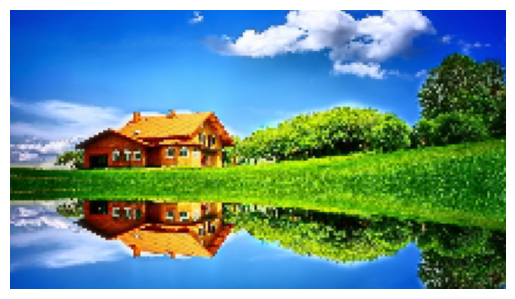

In [3]:
image = cv2.imread(".\img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
r, c = image.shape[:2]
out_r = 120
image = cv2.resize(image, (int(out_r*float(c)/r), out_r))
print(type(image))
pixels = image.reshape((-1, 3))
print(pixels.shape)
print(image.shape)
plt.axis("off")
plt.imshow(image)

In [4]:
km = KMeans(n_clusters=8, n_init=10)
km.fit(pixels)

KMeans(n_init=10)

In [5]:
colors = np.asarray(km.cluster_centers_, dtype='uint8')
print(colors)

[[136  46  10]
 [ 88 164 235]
 [119 180  29]
 [209 195  58]
 [ 24 102 211]
 [196 216 240]
 [ 57 116  20]
 [ 20  44   8]]


In [6]:
percentage = np.asarray(np.unique(km.labels_, return_counts = True)[1], dtype='float32')
percentage = percentage/pixels.shape[0]
percentage

array([0.03779343, 0.20539907, 0.10841158, 0.06533647, 0.21995305,
       0.10352112, 0.11964006, 0.13994522], dtype=float32)

# Bar Plot:

In [7]:
# Print all colors in hexadecimal and their corresponding percentages
for color, pct in zip(colors, percentage):
    hex_color = rgb_to_hex(color)
    print(f"Color: {hex_color}, Percentage: {pct * 100:.2f}%")

Color: #882e0a, Percentage: 3.78%
Color: #58a4eb, Percentage: 20.54%
Color: #77b41d, Percentage: 10.84%
Color: #d1c33a, Percentage: 6.53%
Color: #1866d3, Percentage: 22.00%
Color: #c4d8f0, Percentage: 10.35%
Color: #397414, Percentage: 11.96%
Color: #142c08, Percentage: 13.99%


# Dominant Colors

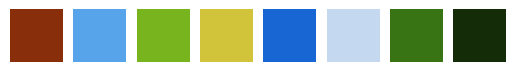

In [8]:
plt.figure(0)
for ix in range(colors.shape[0]):
    patch = np.ones((20, 20, 3), dtype='uint8')
    patch[:, :, :] = colors[ix]
    plt.subplot(1, colors.shape[0], ix + 1)
    plt.axis('off')
    plt.imshow(patch)
plt.show()

In [9]:
dom = [[percentage[ix], colors[ix]] for ix in range(km.n_clusters)]
dominance = sorted(dom, key=lambda x:x[0], reverse=True)

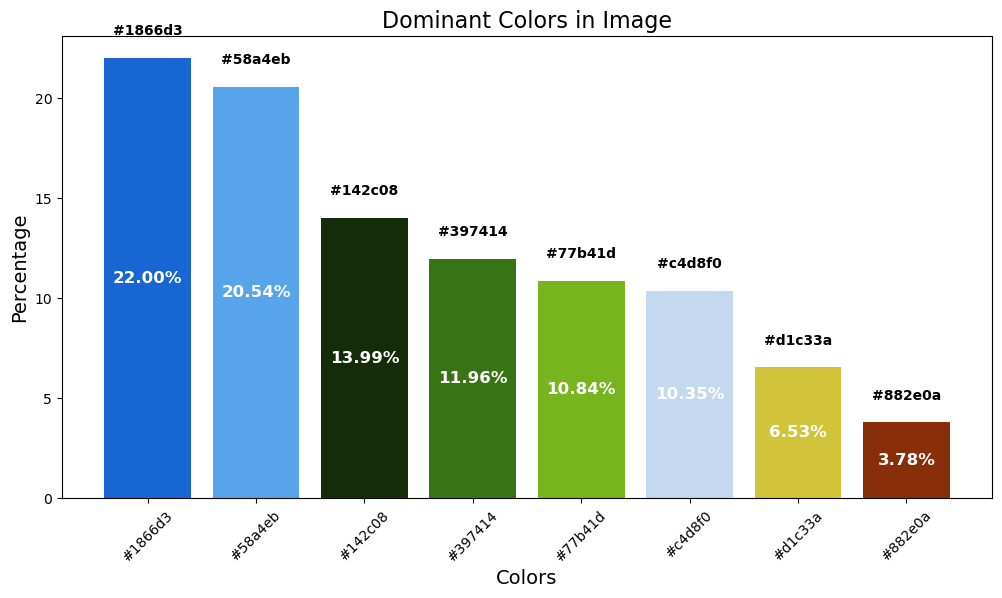

In [10]:
# Bar plot with colors, hex codes, and percentages
fig, ax = plt.subplots(figsize=(12, 6))

bars = [rgb_to_hex(dominance[ix][1]) for ix in range(km.n_clusters)]
percentages = [dominance[ix][0] * 100 for ix in range(km.n_clusters)]
hex_colors = [rgb_to_hex(dominance[ix][1]) for ix in range(km.n_clusters)]

ax.bar(bars, percentages, color=hex_colors)

# Adding percentage and hex labels on the bars
for i in range(len(bars)):
    ax.text(i, percentages[i] / 2, f'{percentages[i]:.2f}%', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text(i, percentages[i] + 1, hex_colors[i], ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Colors', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Dominant Colors in Image', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [12]:
for px in range(pixels.shape[0]):
    for ix in range(colors.shape[0]):
        pixels[px] =colors[km.labels_[px]]

In [13]:
img = pixels.reshape(out_r, -1, 3)
print(img.shape)

(120, 213, 3)


# Image Regeneration with k centers

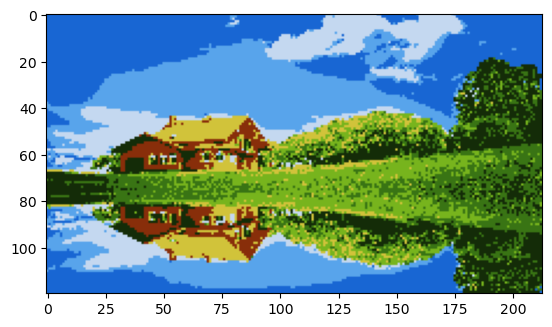

In [14]:
plt.imshow(img)

In [15]:
# Most dominant color
most_dominant_color = dominance[0][1]
most_dominant_color_hex = rgb_to_hex(most_dominant_color)
print(f"Most dominant color (hex): {most_dominant_color_hex}")

Most dominant color (hex): #1866d3
